In [2]:
!pip install qiskit qiskit-aer matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.6 MB/s eta 0:00:00


In [3]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=6e0c74d02f92d899f1edef9a755964a4277ec2560002087dfc0529774a9268a7
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [25]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [26]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np

In [5]:
def apply_heisenberg_pair(qc, q1, q2, theta):
    # X⊗X
    qc.h(q1)
    qc.h(q2)
    qc.cx(q1, q2)
    qc.rz(2 * theta, q2)
    qc.cx(q1, q2)
    qc.h(q1)
    qc.h(q2)
    # Y⊗Y
    qc.rx(-np.pi/2, q1)
    qc.rx(-np.pi/2, q2)
    qc.cx(q1, q2)
    qc.rz(2 * theta, q2)
    qc.cx(q1, q2)
    qc.rx(np.pi/2, q1)
    qc.rx(np.pi/2, q2)
    # Z⊗Z
    qc.cx(q1, q2)
    qc.rz(2 * theta, q2)
    qc.cx(q1, q2)


In [6]:
# 3-spin Heisenberg circuit
def three_spin_heisenberg(theta):
    qc = QuantumCircuit(3)
    qc.h(0)
    qc.h(1)
    qc.h(2)
    apply_heisenberg_pair(qc, 0, 1, theta)
    apply_heisenberg_pair(qc, 1, 2, theta)
    qc.measure_all()
    return qc


In [7]:
theta = np.pi / 8  # Trotter step (evolution time)
backend = Aer.get_backend("qasm_simulator")

qc3 = three_spin_heisenberg(theta)
result3 = backend.run(transpile(qc3, backend), shots=1024).result()
counts3 = result3.get_counts()

In [14]:
print("Three-Spin Heisenberg Simulation Result:")
print(counts3)

Three-Spin Heisenberg Simulation Result:
{'001': 101, '110': 90, '101': 125, '100': 144, '010': 139, '000': 137, '111': 150, '011': 138}


/tmp/ipython-input-28-1942492855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Counts", y="State", data=df_counts, palette="viridis")


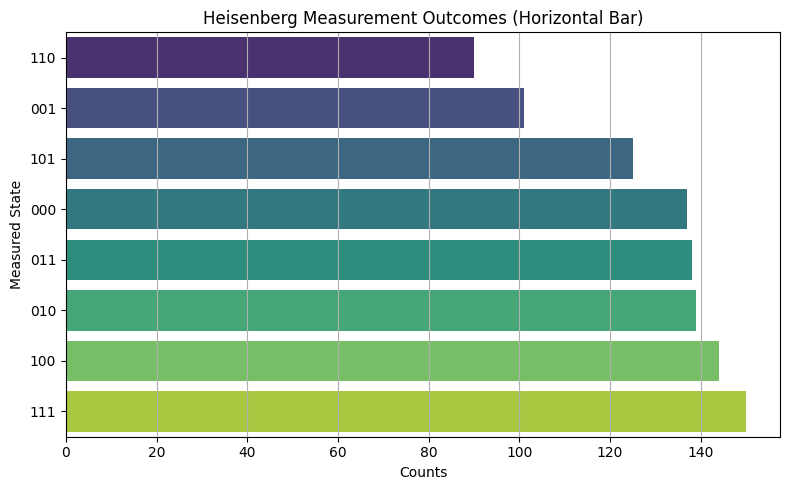

In [28]:
"""df_counts = pd.DataFrame(counts3.items(), columns=["State", "Counts"])
df_counts = df_counts.sort_values("Counts", ascending=True)

plt.figure(figsize=(8, 5))
sns.barplot(x="Counts", y="State", data=df_counts, palette="viridis")
plt.title("Heisenberg Measurement Outcomes (Horizontal Bar)")
plt.xlabel("Counts")
plt.ylabel("Measured State")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

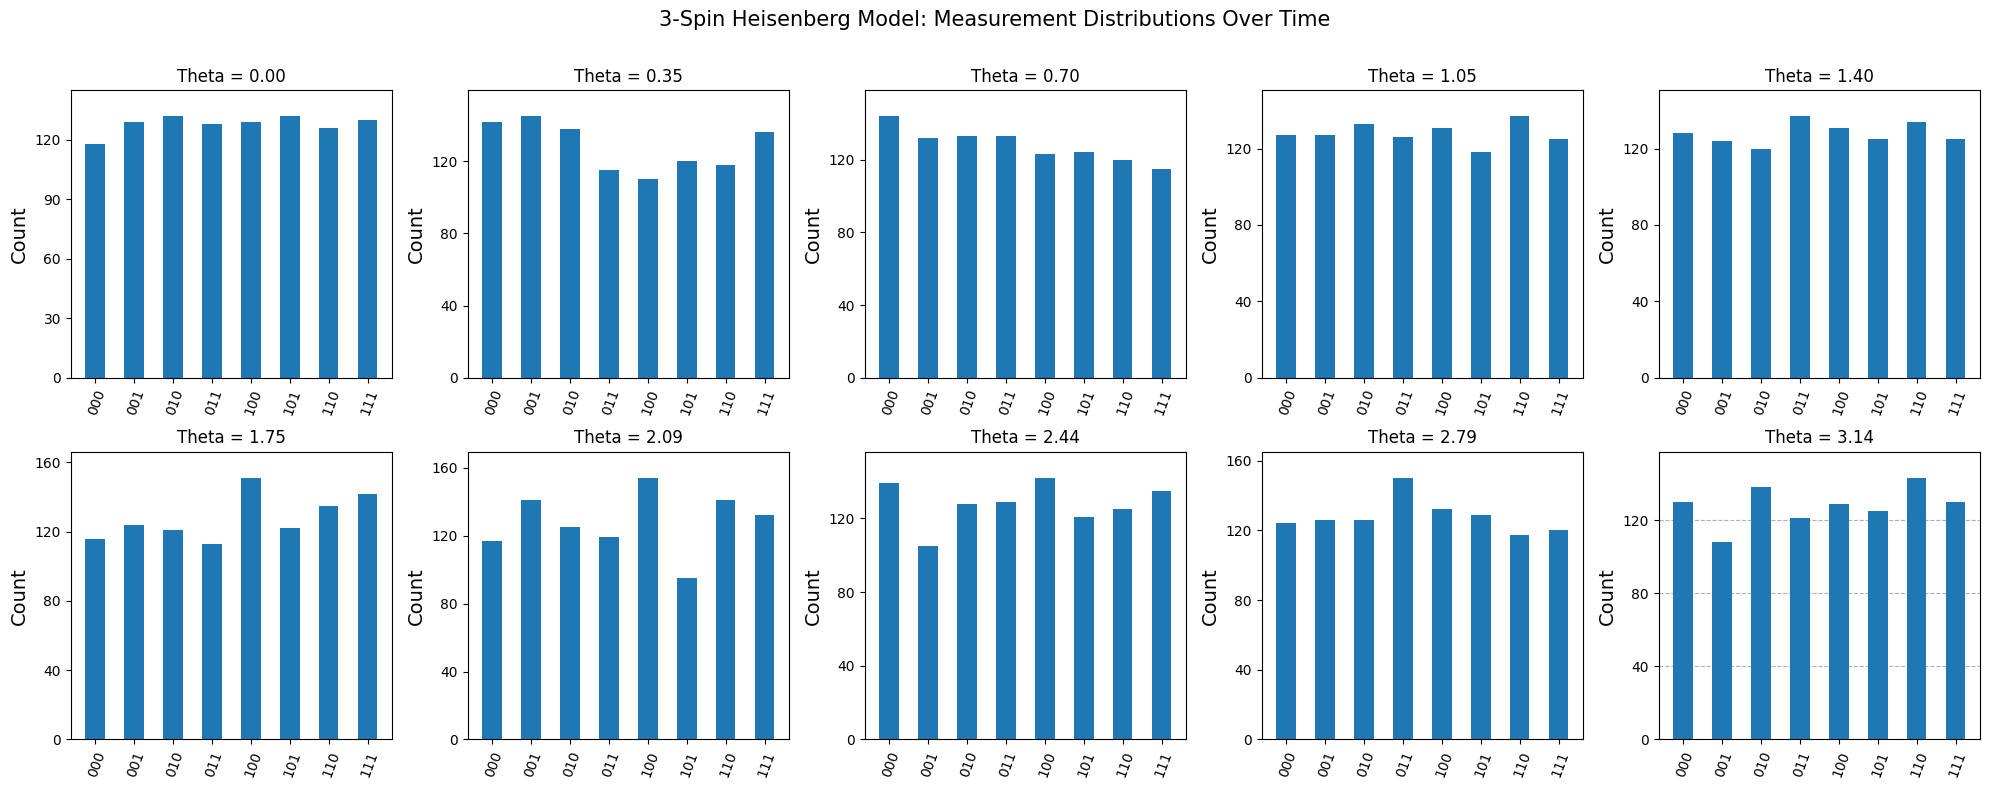

In [29]:
"""changing theta will change time hence plotting theta from 0 to pi"""
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i, (theta, counts) in enumerate(all_counts):
    ax = axs[i // 5][i % 5]
    plot_histogram(counts, ax=ax, bar_labels=False)
    ax.set_title(f"Theta = {theta:.2f}")

plt.suptitle("3-Spin Heisenberg Model: Measurement Distributions Over Time", fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()